<a href="https://colab.research.google.com/github/jjwang1118/Human_emotion_predict/blob/main/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:

from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DL/fer2013.csv")

emotion_map={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}

In [ ]:
def CRNO(df, dataName):
    # 過濾掉像素長度不對的資料
    df = df[df['pixels'].apply(lambda x: len(x.split()) == 48*48 if isinstance(x, str) else len(x) == 48*48)]

    # 把像素字串轉 list
    df['pixels'] = df['pixels'].apply(
        lambda x: [int(p) for p in x.split()] if isinstance(x, str) else x
    )

    # 轉成 numpy array 並正規化
    data_X = np.array(df['pixels'].tolist(), dtype='float32').reshape(-1, 48, 48, 1)
    data_X = data_X / 255.0

    # One-hot 編碼
    data_Y = to_categorical(df['emotion'], num_classes=7)

    print(f"{dataName}_X shape: {data_X.shape}, {dataName}_Y shape: {data_Y.shape}")
    return data_X, data_Y


In [ ]:
#資料分割
train_data = data[data["Usage"]=="Training"].copy()
valid_data = data[data["Usage"]=="PublicTest"].copy()
test_data = data[data["Usage"]=="PrivateTest"].copy()

train_data_x,train_data_y=CRNO(train_data,"train")
valid_data_x,valid_data_y=CRNO(valid_data,"valid")
test_data_x,test_data_y=CRNO(test_data,"test")

train_X shape: (28709, 48, 48, 1), train_Y shape: (28709, 7)
valid_X shape: (3589, 48, 48, 1), valid_Y shape: (3589, 7)
test_X shape: (3589, 48, 48, 1), test_Y shape: (3589, 7)


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
Normalized confusion matrix


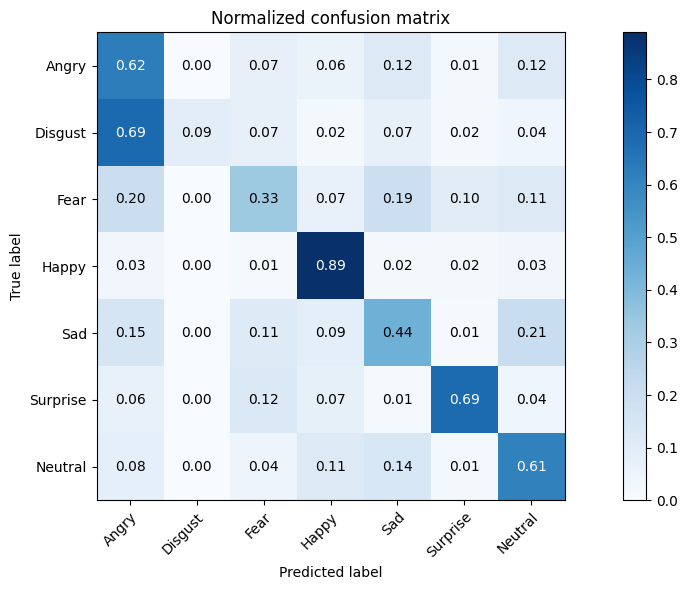

In [ ]:

model = load_model("/content/drive/MyDrive/DL/my_model.h5")

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    此函数打印和绘制混淆矩阵
    可以通过设置“normalize=True”来应用规范化。
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 仅使用数据中显示的标签
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # 绘制混淆矩阵
    fig, ax = plt.subplots(figsize=(12, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # 显示所有的标记
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # 旋转x轴标签并设置其对齐方式
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # 在数据维度上循环并创建文本批注
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# 使用该函数绘制混淆矩阵
# 假设 `test_true` 和 `test_pred` 是测试集的真实标签和预测标签
# `emotion_labels` 是标签的列表
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
# 假设 test_data_y 是测试集的真实标签，模型的预测结果存储在 test_pred 中
test_true = np.argmax(test_data_y, axis=1)  # 将 one-hot 编码转为标签
test_pred = np.argmax(model.predict(test_data_x), axis=1)  # 使用模型预测测试集并转换为标签

# 绘制混淆矩阵
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.savefig("/content/drive/MyDrive/DL/pict/ConfusionMatrix_model.png")
plt.show()



113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
Normalized confusion matrix


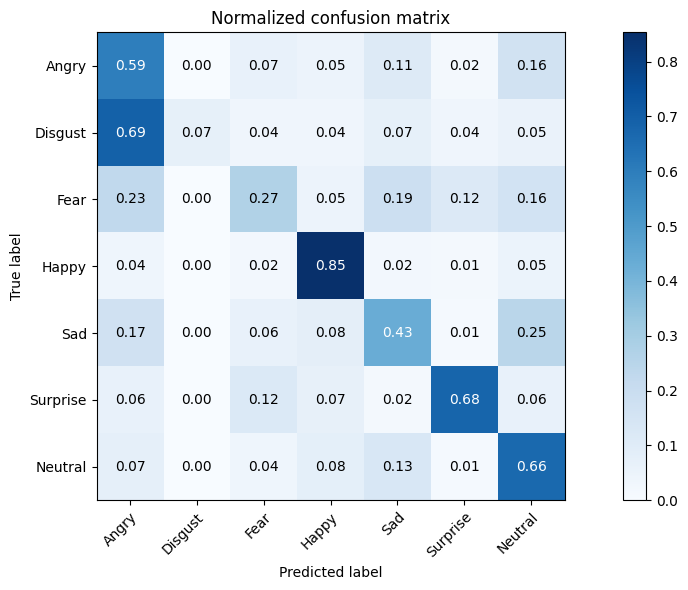

In [ ]:

model = load_model("/content/drive/MyDrive/DL/my_model_01.h5")

test_true = np.argmax(test_data_y, axis=1)  # 将 one-hot 编码转为标签
test_pred = np.argmax(model.predict(test_data_x), axis=1)  # 使用模型预测测试集并转换为标签

# 绘制混淆矩阵
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.savefig("/content/drive/MyDrive/DL/pict/ConfusionMatrix_model_01.png")
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step
Normalized confusion matrix


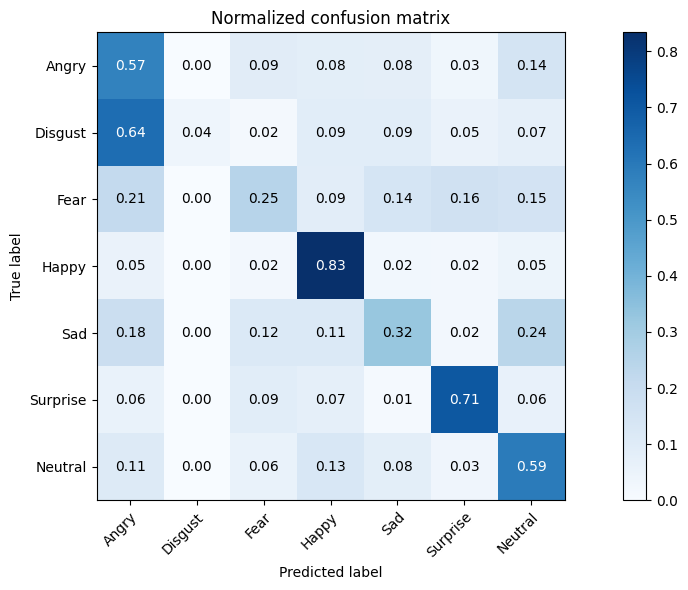

In [ ]:

model = load_model("/content/drive/MyDrive/DL/my_model_02.h5")

test_true = np.argmax(test_data_y, axis=1)  # 将 one-hot 编码转为标签
test_pred = np.argmax(model.predict(test_data_x), axis=1)  # 使用模型预测测试集并转换为标签
# 绘制混淆矩阵
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.savefig("/content/drive/MyDrive/DL/pict/ConfusionMatrix_model_02.png")
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step
Normalized confusion matrix


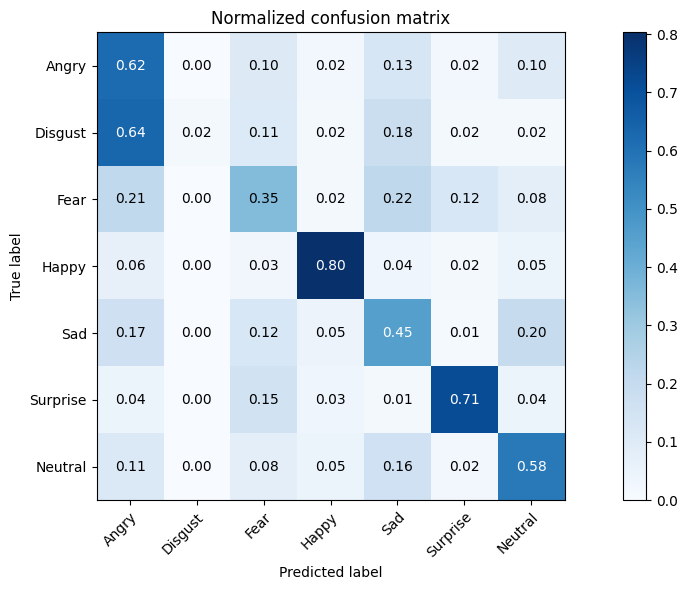

In [ ]:
model = load_model("/content/drive/MyDrive/DL/my_model_03.h5")

test_true = np.argmax(test_data_y, axis=1)  # 将 one-hot 编码转为标签
test_pred = np.argmax(model.predict(test_data_x), axis=1)  # 使用模型预测测试集并转换为标签
# 绘制混淆矩阵
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.savefig("/content/drive/MyDrive/DL/pict/ConfusionMatrix_model_03.png")
plt.show()